In [1]:
# For NumCosmo
import os
import sys
import gi

gi.require_version('NumCosmo', '1.0')
gi.require_version('NumCosmoMath', '1.0')
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

from scipy.stats import chi2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
import math
# The corner package is needed to view the results of the MCMC analysis
import corner



In [2]:
os.environ['CLMM_MODELING_BACKEND'] = 'nc'

__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [3]:
mcat  = Ncm.MSetCatalog.new_from_file_ro ("../examples/example_rosenbrock_aps_st_800.fits", 0)
#mcat2 = Ncm.MSetCatalog.new_from_file_ro ("../examples/example_rosenbrock_stretch_st_400.fits", 0)
nwalkers = 800
burnin   = 30

In [4]:
s1d1 = chi2.cdf (1.0, df = 1)
s1d2 = chi2.cdf (4.0, df = 1)
s2d1 = chi2.cdf (1.0, df = 1)
s2d2 = chi2.cdf (4.0, df = 1)
s2d3 = chi2.cdf (9.0, df = 1)
qts = [0.5 - s1d2 / 2.0, 0.5 - s1d1 / 2.0, 0.5, 0.5 + s1d1 / 2.0, 0.5 + s1d2 / 2.0]

print (qts)
print (s2d1, s2d2, s2d3)


[0.022750131948179264, 0.15865525393145707, 0.5, 0.8413447460685429, 0.9772498680518207]
0.6826894921370859 0.9544997361036415 0.9973002039367398


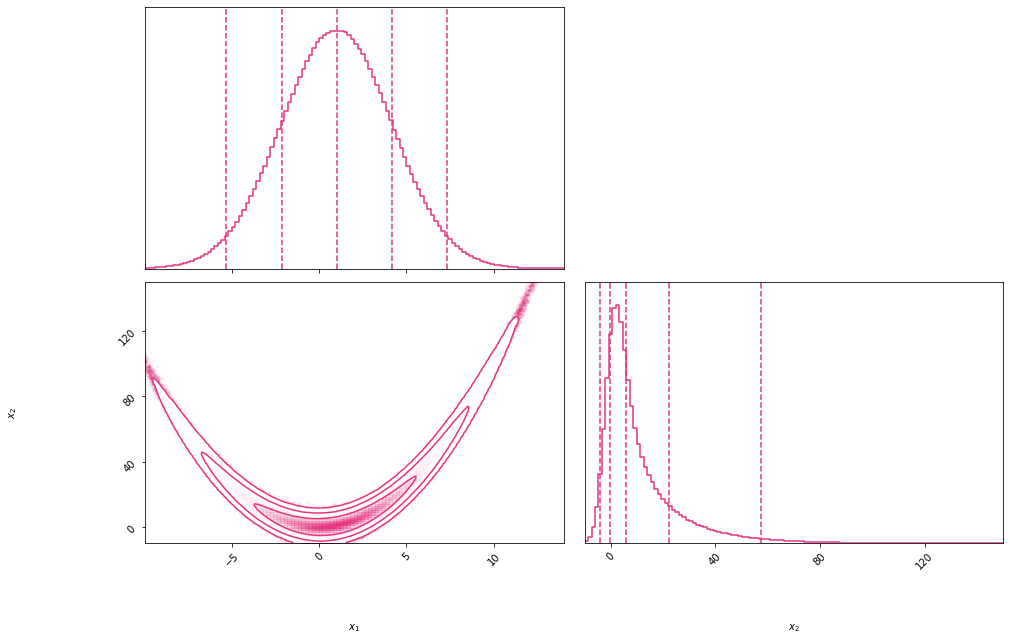

In [5]:
rows = np.array ([mcat.peek_row (i).dup_array () for i in range (nwalkers * burnin, mcat.len ())])
params = ["$" + mcat.col_symb (i) + "$" for i in range (mcat.ncols ())]
figure = corner.corner (rows[:,1:], labels = params[1:], reverse = False,
                        quantiles=qts, levels = (s2d1, s2d2, s2d3), 
                        bins = 120, smooth = 0.8, smooth1d = 0.8, color = (0.9, 0.2, 0.5, 1.0),
                        range = [(-10, 14), (-10, 150)])

#rows2 = np.array ([mcat2.peek_row (i).dup_array () for i in range (nwalkers * burnin, mcat2.len ())])
#params = ["$" + mcat2.col_symb (i) + "$" for i in range (mcat2.ncols ())]
#figure = corner.corner (rows2[:,1:], labels = params[1:], reverse = False,
#                        levels = (s2d1, s2d2, s2d3), color = (0.1, 0.2, 0.5, 0.5),
#                        bins = 120, smooth = 0.8, smooth1d = 0.8, fig = figure)

figure.set_size_inches(16, 10)


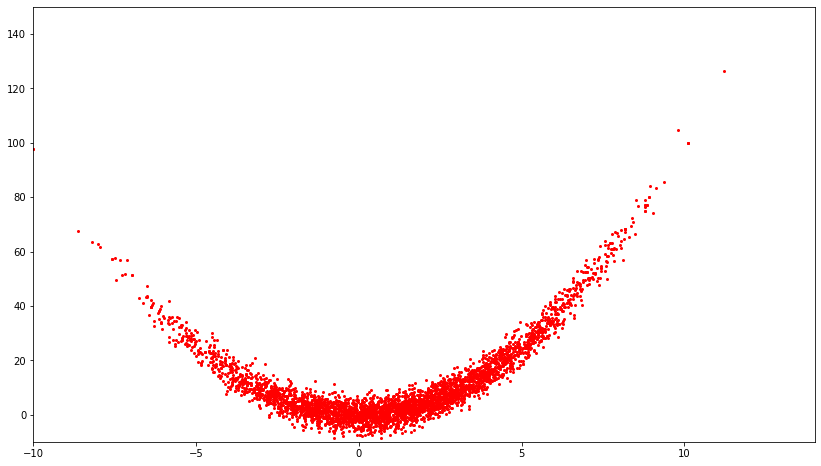

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set(xlim=(-10, 14), ylim=(-10, 150))

scat = ax.scatter(rows[0:nwalkers,1], rows[0:nwalkers,2], s = 4, c = "red")
#scat2 = ax.scatter(rows2[0:nwalkers,1], rows[0:nwalkers,2], s = 4, c = "blue")

nframes = 600
b = np.unique (np.floor (np.linspace (0, rows.shape[0]/nwalkers, nframes)).astype(int))
nframes = len (b)

def animate(i):    
    x_i = rows[nwalkers * b[i] : nwalkers * b[i + 1], 1]
    y_i = rows[nwalkers * b[i] : nwalkers * b[i + 1], 2]
    #x2_i = rows2[nwalkers * b[i] : nwalkers * b[i + 1], 1]
    #y2_i = rows2[nwalkers * b[i] : nwalkers * b[i + 1], 2]
    scat.set_offsets(np.c_[x_i, y_i])
    #scat2.set_offsets(np.c_[x2_i, y2_i])

anim = FuncAnimation (fig, animate, interval=50, frames=nframes-1)
 
#plt.draw()
#plt.show()


HTML(anim.to_html5_video())

